# Deep Belief Network

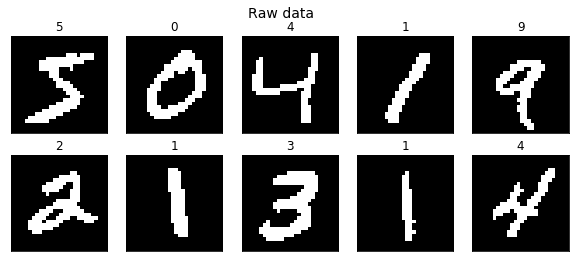

In [1]:
import os
import sys
sys.path.append(os.getcwd() + r'\deepbeliefpack')

import pickle
import dataload as dld
from torchvision import transforms
import visual as vs
import rbm as rbms
import dbn as dbns


"""
The main program is instructed whether to train a model again, which model, whether
to save the dataset and model as serialized objects.

Hyper-paramters as batch size, learning rate and network architecture must be 
defined by the user.
"""

train = True
save  = False
load  = False
model = 'dbn'

batch_size = 128
transfs = [transforms.ToTensor()]
loader = dld.LoadDataset(batch_size, transfs)
Xtrain, Ytrain, Xtest, Ytest = loader.yield_data(binarize = True, factor = 4)
vs.plot_images_grid(Xtrain[0],Ytrain[0], title = 'Raw data')

Training RBM 1
____________________
Epoch 01 Training loss = 0.263702
Epoch 02 Training loss = 0.189908
Epoch 03 Training loss = 0.171415
Epoch 04 Training loss = 0.161404
Epoch 05 Training loss = 0.154678
Epoch 06 Training loss = 0.149950
Epoch 07 Training loss = 0.146210
Epoch 08 Training loss = 0.143231
Epoch 09 Training loss = 0.140588


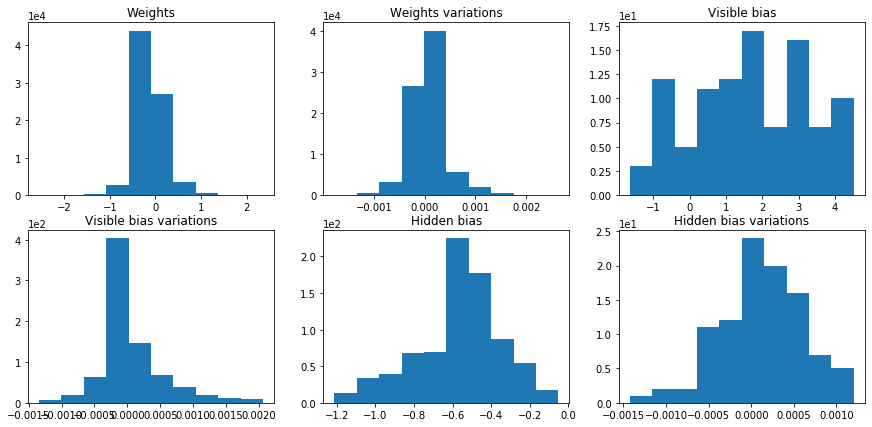

Epoch 10 Training loss = 0.138431


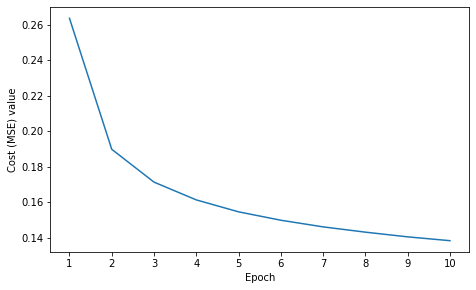

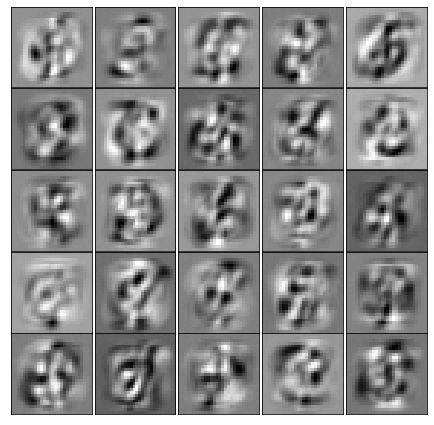

Training RBM 2
____________________
Epoch 01 Training loss = 0.693248
Epoch 02 Training loss = 0.499992
Epoch 03 Training loss = 0.431079
Epoch 04 Training loss = 0.387413
Epoch 05 Training loss = 0.358695
Epoch 06 Training loss = 0.338828
Epoch 07 Training loss = 0.322857
Epoch 08 Training loss = 0.310968
Epoch 09 Training loss = 0.300305


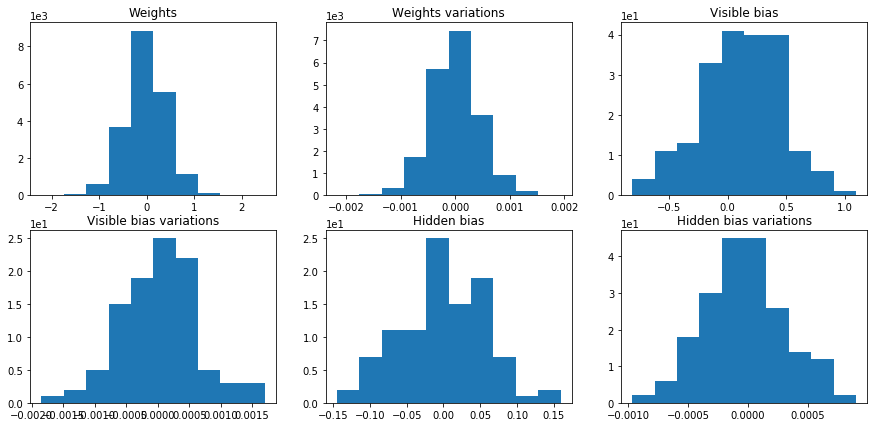

Epoch 10 Training loss = 0.292139


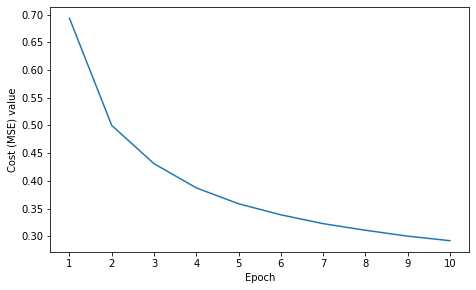

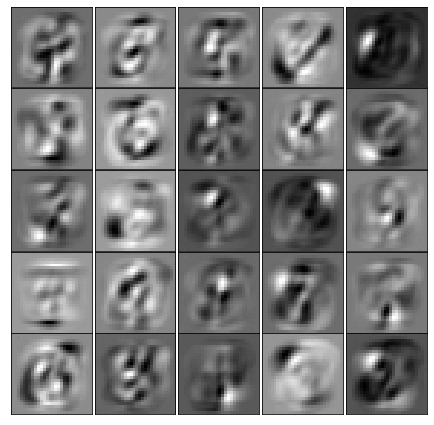

Layer 1
Layer 2
Layer 0


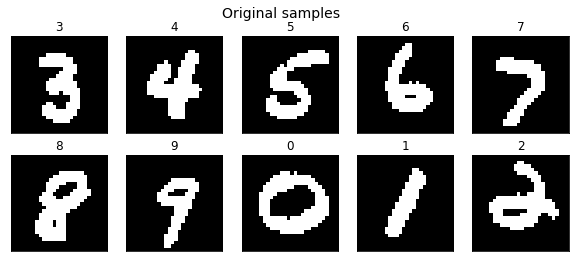

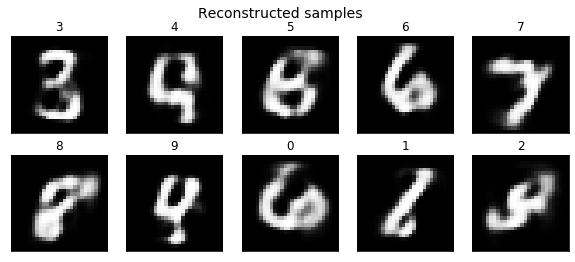

Layer 1
Layer 2
Layer 0


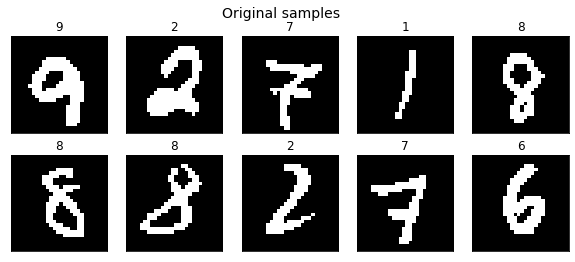

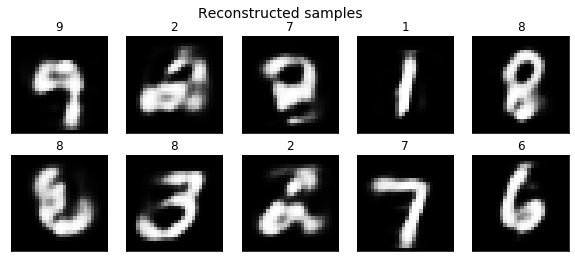

Layer 1
Layer 2
Layer 0


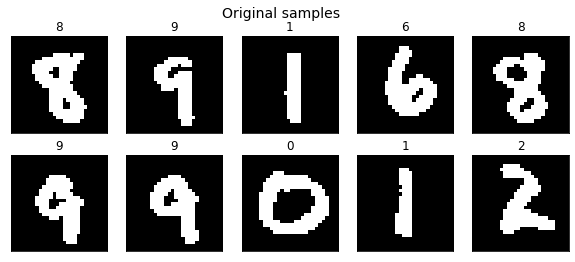

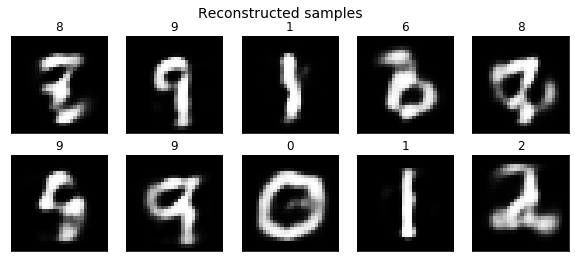

Layer 1
Layer 2
Layer 0


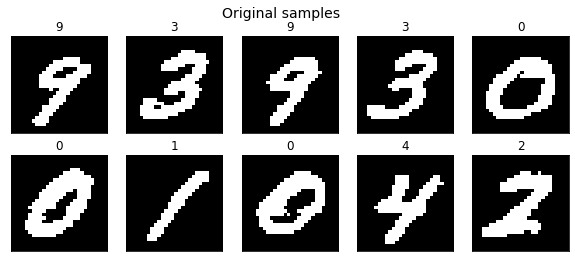

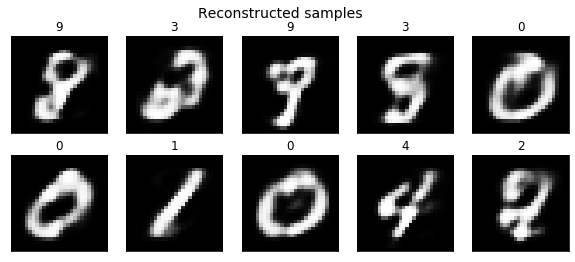

Layer 1
Layer 2
Layer 0


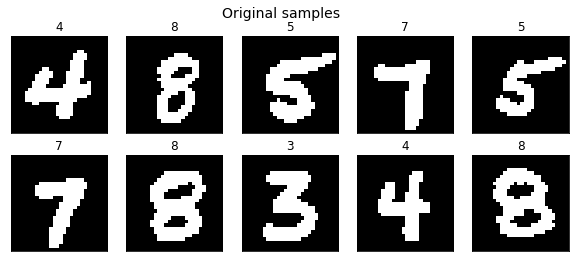

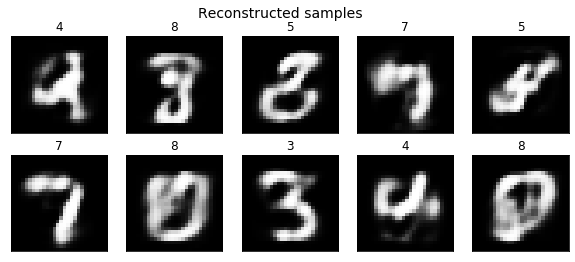

In [2]:
visible_dim = Xtrain[0][0].shape[0]
hidden_dims = [100, 200]

epochs        = 10
learning_rate = 0.025
weights_decay = 0.0001
momentum      = 0.5
mcmc_steps    = 2


if model == 'rbm':
    
    if train:
        rbm = rbms.RestrictedBoltzmannMachine(visible_dim, hidden_dims[0])
        rbm.contrastive_divergence_train([Xtrain,Ytrain], epochs,
                                          learning_rate, weights_decay, momentum,
                                          mcmc_steps)
        rbm.reconstruction([Xtest,Ytest])
        if save:
            with open('models\rbm.pickle','wb') as handle: pickle.dump(rbm, handle)
        #end
        
    elif load:
        with open('models\rbm.pickle','rb') as handle: rbm = pickle.load(handle)
    #end
    
elif model == 'dbn':
    
    if train:
        dbn = dbns.DeepBeliefNet(visible_dim, hidden_dims)
        dbn.contrastive_divergence_train([Xtrain,Ytrain], epochs,
                                         learning_rate, weights_decay, momentum,
                                         mcmc_steps)
        dbn.reconstruction([Xtest,Ytest])
        if save: 
            with open('models\dbn.pickle','wb') as handle: pickle.dump(dbn, handle)
        #end
    elif load:
        with open('models\dbn.pickle','rb') as handle: dbn = pickle.load(handle)
    #end
#end

### Test reconstruction of corrupted data samples

In [ ]:
import numpy as np

side_dim     = int(np.sqrt(Xtrain[0][0].shape[0]))
row          = 3
rows_to_kill = 5

"""
Corruption.
The images are vectorized, i.e. 28x28 matrices flattened. 
Recall the good old row-major order. Assume we want to delete the i to i+k-th 
rows, setting all the pixels is such rows to 0.0 -- i.e. black. 
Then all the matrix entries from (i+1)*28 to (i+k)*dim + dim should be selected.
Considering the flattened matrix, it translated simply to setting to 0.0 the 
entries of the vector X[(i+1)*dim : (i+k)*dim +dim].
"""

x = Xtest[0] # one batch
for x in Xtest:
    x[:, (row + 1)*side_dim : (row + rows_to_kill)*side_dim + side_dim] = 0.0
#end
vs.plot_images_grid(Xtest[0], Ytest[0], title = 'corrupted images')

dbn.reconstruction([Xtest,Ytest])
